Python Data Toolkit Assignment

---

**1. What is the difference between multithreading and multiprocessing?**
-  The main difference between multithreading and multiprocessing lies in how tasks are divided and executed by the system to improve performance and efficiency.

  - **Multithreading**
    - Definition: Running multiple threads (smaller units of a process) within the same process.
    - Memory: All threads share the same memory space.
    - Speed: Lightweight and faster to start because threads share resources.
    - Communication: Easier (since they share memory).
    - Limitation: In Python, due to the Global Interpreter Lock (GIL), only one thread executes Python bytecode at a time — meaning multithreading is not ideal for CPU-bound tasks.
    - Best for:I/O-bound tasks (e.g., file read/write, network calls, web scraping).
  - **Multiprocessing**
    - Definition: Running multiple processes, each with its own Python interpreter and memory space.
    - Memory: Processes do not share memory by default.
    - Speed: Heavier (more overhead) because each process is independent.
    - Communication: More complex (requires inter-process communication).
    - Advantage: Not affected by GIL — true parallelism.
    - Best for:CPU-bound tasks (e.g., heavy computations, data processing).

**2. What are the challenges associated with memory management in Python?**
- Memory management in Python is largely automatic thanks to its built-in garbage collection system, but several challenges can still arise—especially in long-running or data-intensive applications.
  - **Major Challenges in Python Memory Management**
    - Memory Leaks : Memory leaks occur when objects remain referenced accidentally, preventing the garbage collector from freeing their memory. Common causes include lingering global variables, unclosed file handlers, or improperly used caching mechanisms. These leaks gradually consume available memory, potentially leading to degraded performance or MemoryError exceptions.
    - Circular References : Python uses reference counting along with a cyclic garbage collector. However, objects that reference each other form reference cycles. Such cycles prevent immediate memory release since their reference count never reaches zero. The garbage collector periodically looks for these cycles, but detection can be computationally expensive and sometimes incomplete.
    - Inconsistent Memory Release : Unlike languages such as C, Python does not always release memory back to the operating system after freeing it internally. The interpreter’s allocator holds onto memory for reuse rather than returning it, which can appear as a “memory leak” in long-running applications. This behavior complicates performance tuning, especially for server applications or containers with limited RAM.
    - Large Dataset Handling : Python’s dynamic typing and object model make data-heavy computations memory inefficient. Each Python object carries metadata overhead, so using structures like large lists or dictionaries for big data processing may cause excessive consumption. Libraries like NumPy mitigate this by using compact, contiguous memory arrays.
    - External Dependencies : Some third-party modules (e.g., poorly optimized C extensions or data science libraries) may handle memory inefficiently or fail to deallocate resources properly, leading to hidden leaks within external code.
    - Garbage Collection Overhead : Automatic garbage collection introduces computational overhead, especially with frequent object allocations. Python’s generational GC system can occasionally pause program execution during collection or delay cleanup of large object graphs.



**3. Write a Python program that logs an error message to a log file when a
division by zero exception occurs.**

In [1]:
import logging

# Configure logging
logging.basicConfig(
    filename='error_log.txt',        # Log file name
    level=logging.ERROR,             # Log only errors or above
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def divide_numbers(a, b):
    try:
        result = a / b
        print(f"The result is: {result}")
    except ZeroDivisionError:
        logging.error("Division by zero occurred! a=%s, b=%s", a, b)
        print("Error: Division by zero! Check error_log.txt for details.")

# Example usage
divide_numbers(10, 0)


ERROR:root:Division by zero occurred! a=10, b=0


Error: Division by zero! Check error_log.txt for details.


**4. Write a Python program that reads from one file and writes its content to
another file.**


In [3]:
def copy_file(source_file, destination_file):
    try:
        with open(source_file, 'r') as src:
            content = src.read()
        with open(destination_file, 'w') as dest:
            dest.write(content)
        print(f"File content successfully copied from {source_file} to {destination_file}")
    except FileNotFoundError:
        print("Error: The source file does not exist.")
    except IOError:
        print("Error: An I/O error occurred while handling the files.")

# Example usage:
copy_file('source.txt', 'destination.txt')



Error: The source file does not exist.


**5. Write a program that handles both IndexError and KeyError using a
try-except block.**


In [4]:
def handle_errors():
    my_list = [10, 20, 30]
    my_dict = {"a": 1, "b": 2, "c": 3}

    try:
        # This will raise IndexError
        print(my_list[5])

        # This will raise KeyError
        print(my_dict["z"])

    except IndexError:
        print("Error: Tried to access an index that doesn’t exist in the list.")

    except KeyError:
        print("Error: Tried to access a key that doesn’t exist in the dictionary.")

# Run the function
handle_errors()


Error: Tried to access an index that doesn’t exist in the list.


**6. What are the differences between NumPy arrays and Python lists?**
- NumPy arrays and Python lists are both used to store collections of data, but they have significant differences in structure, performance, and usage.

 - **NumPy arrays**
   - Data Type : Stores elements of the same data type for efficiency.
   - Performance : NumPy arrays are much faster and more memory-efficient because they are implemented in C and use contiguous memory blocks.
   - Operations : NumPy Array Supports vectorized operations — operations applied to all elements without explicit loops.
   - Memory Usage : NumPy arrays are more compact and efficient in memory because they store data in continuous memory blocks.
   - Functionality : NumPy arrays come with hundreds of built-in mathematical and statistical functions: np.mean(), np.sum(), np.dot(), np.reshape() etc.
   - Dimensionality : NumPy Array Naturally supports multi-dimensional arrays and matrix operations.
- **Python Lists**
   - Data Type : List Can store mixed data types (e.g., integers, strings, floats together).
   - Performance : Lists are slower due to being generic containers (holding references to Python objects)
   - Operations : Operations are element-wise only through loops or list comprehensions.
   - Memory Usage : Lists store references (pointers) to objects, consuming more memory.
   - Functionality : Lists do not support such mathematical operations directly.
   - Dimensionality : Usually 1D, though you can make lists of lists (e.g., [[1,2],[3,4]]), but operations on them are cumbersome.


**7. Explain the difference between apply() and map() in Pandas.**
- The difference between apply() and map() in Pandas primarily lies in the types of objects they operate on and their functionality:
  - map()
    - Defined only on Series objects.
    - Can accept a function, dictionary, or Series to map values element-wise.
    - Operates on each element independently, replacing or transforming values based on the mapping provided.
    - Typically used for simple element-wise transformations or value mapping (e.g., categorical replacements).
    - Does not work on DataFrames directly.
    - Faster for simple, element-wise operations on Series.
  - apply()
    - Defined on both Series and DataFrame objects.
    - Takes a function as input and applies it to the Series or along an axis (rows or columns) of a DataFrame.
    - More versatile and powerful, allowing complex operations including aggregation, row/column-wise processing, and custom functions.
    - For DataFrames, it applies the function across rows or columns, not just element-wise.
    - Slower than map() for simple transformations, but necessary for more complex logic.

**8. Create a histogram using Seaborn to visualize a distribution.**


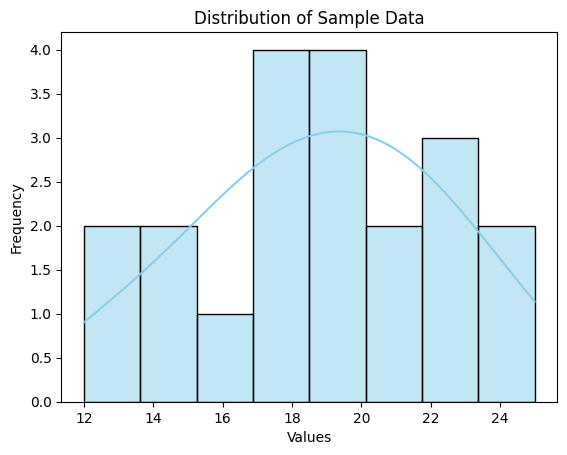

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = [12, 15, 13, 17, 19, 21, 18, 20, 22, 19, 17, 15, 16, 18, 21, 23, 25, 24, 22, 20]

# Create histogram
sns.histplot(data, bins=8, kde=True, color='skyblue')

# Add titles and labels
plt.title("Distribution of Sample Data")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the plot
plt.show()


**9. Use Pandas to load a CSV file and display its first 5 rows.**

In [19]:
import pandas as pd

# Load the CSV file
# Replace "data.csv" with your file name or path
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Display the first 5 rows
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


**10. Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.**


     A    B    C    D
A  1.0 -1.0  1.0 -0.7
B -1.0  1.0 -1.0  0.7
C  1.0 -1.0  1.0 -0.7
D -0.7  0.7 -0.7  1.0


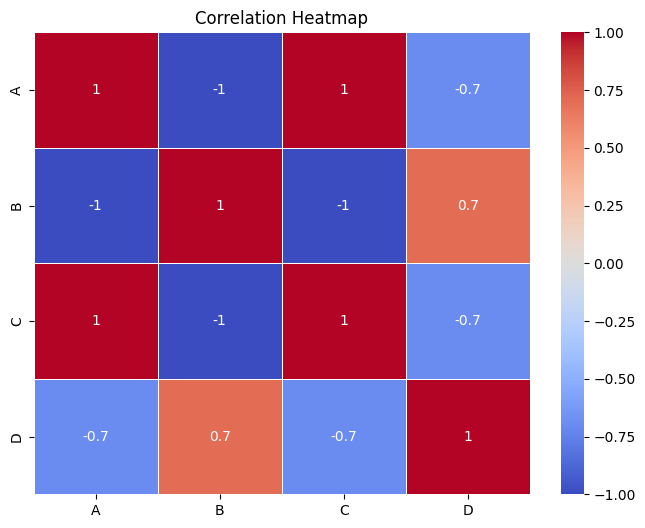

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6],
    'D': [5, 3, 2, 4, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
